# Modelling Infected Cohort

Those that are infected (compartment $I$), and those that have recovered (compartment $R$). 
Infected people recover at a rate $\gamma$ (*gamma*), is the reciprocal of mean infectious period. The differential equations describing this are:

\begin{align}
\frac{dI}{dt} & = -\gamma I \\
\frac{dR}{dt} & = \gamma I \\
\end{align}

In [4]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math
from scipy.integrate import odeint

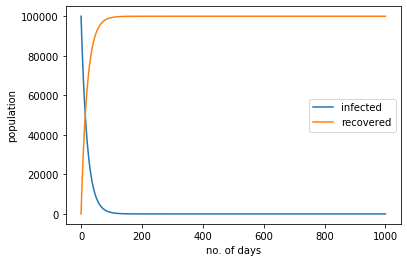

In [5]:
gamma=0.05
def du_dt(u,t):
    return([-u[0]*gamma,u[0]*gamma])
x=np.linspace(0,1000,999)
y0=[100000,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="infected")
plt.plot(x,y[:,1],label="recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Simulating competing hazards

the focus is on adding disease-induced mortality to this model in order to explore the concept of competing hazards as introduced in the video. Using this model, you will also calculate the case fatality ratio, and compare it against the result using the formula approach that you have been introduced to.

The model we want to specify in this notebook has 3 compartments: $I$ (infected), $R$ (recovered) and $M$ (dead). 

The differential equations for the model look like this:
\begin{align}
\frac{dI}{dt} & = -\gamma I -\mu I \\
\frac{dR}{dt} & = \gamma I \\
\frac{dM}{dt} & = \mu I
\end{align}

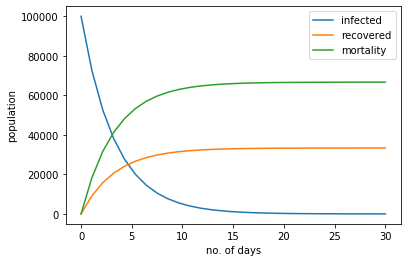

In [6]:
gamma=0.1
nu=0.2
def du_dt(u,t):
    return([-u[0]*(gamma+nu),u[0]*gamma,u[0]*nu])
x=np.linspace(0,30,29)
y0=[100000,0,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="infected")
plt.plot(x,y[:,1],label="recovered")
plt.plot(x,y[:,2],label="mortality")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# SIR Model with a Constant Force of Infection


                     S-->I-->R
                     
The differential equations for this system are:

\begin{align}
\frac{dS}{dt} & = -\lambda S \\
\frac{dI}{dt} & = \lambda S - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

We can use the SIR model to describe a disease that can be split into 3 states: susceptible ($S$), infected ($I$), or recovered (R). All those infected are infectious, and all those recovered are immune, so they cannot get the disease again.

One part of this model should already be very familiar to you! The transition from I to R is what we explored in etivity 1. The new addition is the susceptibles in compartment S. As you learnt in the lecture, depending on how many people in the population are infectious, susceptible people experience a force of infection $\lambda$ (*lambda*), which is the transition rate at which they become infected.

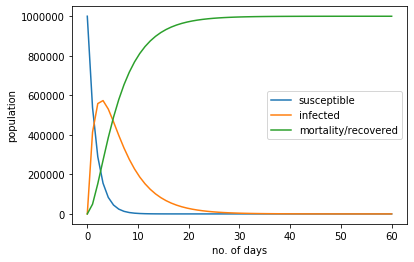

In [8]:
lamda=0.6
def du_dt(u,t):
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(0,60,59)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="mortality/recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# SIR Model with a Dynamic Force of Infection

Now we define $\lambda$ as a function of the infection rate, $\beta$ (*beta*), and the proportion of the population that is infectious, $I/N$. 

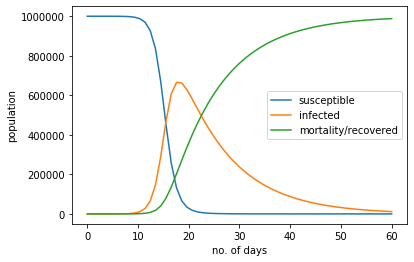

In [9]:
betta=1 # Daily infection rate
nu=0.1
def du_dt(u,t):
    lamda=betta*u[1]/1000000
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(0,60,59)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="mortality/recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# SIR dynamics with varying parameters

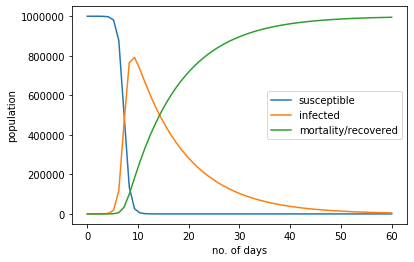

In [10]:
betta=2 # Daily infection rate
nu=0.1
def du_dt(u,t):
    lamda=betta*u[1]/1000000
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(0,60,59)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible")
plt.plot(x,y[:,1],label="infected")
plt.plot(x,y[:,2],label="mortality/recovered")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Simulating the effective reproduction number R<sub>eff</sub>

the expression for the basic reproduction number R<sub>0</sub> in the simple SIR model: we get an epidemic only if $\beta$/$\gamma$ > 1, i.e. if the average number of secondary cases caused by a single infected case in a totally susceptible population is greater than 1. As susceptibility declines over the course of the epidemic, the effective reproduction number R<sub>eff</sub> determines the shape of the epidemic curve as it reflects the amount of immunity in the population at any given time.

Remember that in a simple homogenous SIR model, R<sub>eff</sub> is directly related to the proportion of the population that is susceptible:
\begin{align}
R_{eff} = R_{0} \frac{S}{N}
\end{align}

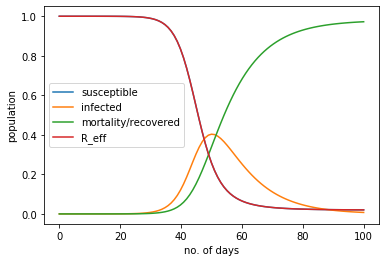

In [11]:
betta=0.4 # Daily infection rate
nu=0.1
r0=betta/nu
pop=1000000
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1],u[1]*nu])
x=np.linspace(0,100,99)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="mortality/recovered")
plt.plot(x,y[:,0]/pop,label="R_eff")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

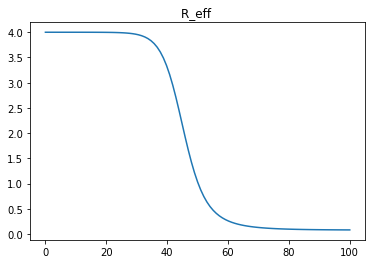

In [12]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()